In [1]:
%load_ext autoreload
%autoreload 2


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
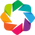

Loaded pretrained model deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B into HookedTransformer
Loaded model: deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B
Model has 28 layers
Model has 12 attention heads per layer
Model has 1536 dimensions
Model uses normalization: RMSPre


In [2]:
from transformer_lens_activations import load_model, attention_analysis

model = load_model("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

In [3]:
# import torch
# with torch.no_grad():
#     logits, cache = model.run_with_cache(model.to_tokens("What is 1 + 1? Use Peano axioms."))

In [14]:
from transformer_lens_activations import get_example_probe_tasks, train_linear_probe_for_task, extract_activations


example_tasks = get_example_probe_tasks(sample_size=500)
data_dict = extract_activations(model, example_tasks)

# example_tasks

Extracting activations:   0%|          | 0/500 [00:00<?, ?it/s]

Extracting activations:   0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
probe_geometry, results = train_linear_probe_for_task(
    model, example_tasks, 'geometry', data_dict,
    epochs=1000, learning_rate=1e-6, weight_decay=0.01,
    val_report_frequency=1, apply_pca=False
)

Original data shape: torch.Size([500, 43008])
Data labels shape: torch.Size([500])


Training geometry probe:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0: Train Loss = 4.6448, Train Acc = 0.6275, Val Loss = 11.9658, Val Acc = 0.0000
Epoch 1: Train Loss = 3.9796, Train Acc = 0.6275, Val Loss = 10.2405, Val Acc = 0.0100
Epoch 2: Train Loss = 3.4161, Train Acc = 0.6175, Val Loss = 8.5736, Val Acc = 0.0100
Epoch 3: Train Loss = 2.8202, Train Acc = 0.6175, Val Loss = 6.9746, Val Acc = 0.0500
Epoch 4: Train Loss = 2.2995, Train Acc = 0.6075, Val Loss = 5.5129, Val Acc = 0.1000
Epoch 5: Train Loss = 1.8905, Train Acc = 0.5900, Val Loss = 4.3844, Val Acc = 0.1800
Epoch 6: Train Loss = 1.5926, Train Acc = 0.5950, Val Loss = 3.5552, Val Acc = 0.2800
Epoch 7: Train Loss = 1.4670, Train Acc = 0.6025, Val Loss = 2.9878, Val Acc = 0.3100
Epoch 8: Train Loss = 1.4331, Train Acc = 0.6075, Val Loss = 2.6257, Val Acc = 0.3900
Epoch 9: Train Loss = 1.3118, Train Acc = 0.6125, Val Loss = 2.4175, Val Acc = 0.4000
Epoch 10: Train Loss = 1.2680, Train Acc = 0.6200, Val Loss = 2.3215, Val Acc = 0.4000
Epoch 11: Train Loss = 1.2324, Train Acc = 0.6175, 

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Epoch 999: Train Loss = 0.0007, Train Acc = 1.0000, Val Loss = 0.1152, Val Acc = 0.9600


accuracy/train,▁▅▆▆▇▇██████████████████████████████████
accuracy/val,▁▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇███████
best/train_accuracy,▁
best/val_accuracy,▁
epoch,▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇██
final/train_accuracy,▁
final/train_loss,▁
final/val_accuracy,▁
final/val_loss,▁
loss/train,█▇▆▆▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
+1,...


In [18]:
probe_difficulty, results = train_linear_probe_for_task(
    model, example_tasks, 'difficulty', data_dict,
    epochs=1000, learning_rate=1e-6, weight_decay=0.01,
    val_report_frequency=1, apply_pca=False, pca_components=50,
)

Original data shape: torch.Size([500, 43008])
Data labels shape: torch.Size([500])


Training difficulty probe:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0: Train Loss = 2.0188, Train Acc = 0.5125, Val Loss = 1.3728, Val Acc = 0.6000
Epoch 1: Train Loss = 1.5449, Train Acc = 0.5500, Val Loss = 1.0315, Val Acc = 0.6200
Epoch 2: Train Loss = 1.3235, Train Acc = 0.5525, Val Loss = 0.8613, Val Acc = 0.6700
Epoch 3: Train Loss = 1.1659, Train Acc = 0.5700, Val Loss = 0.7651, Val Acc = 0.6700
Epoch 4: Train Loss = 1.0771, Train Acc = 0.6175, Val Loss = 0.6955, Val Acc = 0.6900
Epoch 5: Train Loss = 0.9872, Train Acc = 0.6400, Val Loss = 0.6453, Val Acc = 0.7300
Epoch 6: Train Loss = 0.9067, Train Acc = 0.6600, Val Loss = 0.6086, Val Acc = 0.7600
Epoch 7: Train Loss = 0.8747, Train Acc = 0.6775, Val Loss = 0.5813, Val Acc = 0.7500
Epoch 8: Train Loss = 0.8055, Train Acc = 0.6925, Val Loss = 0.5617, Val Acc = 0.7600
Epoch 9: Train Loss = 0.7860, Train Acc = 0.7050, Val Loss = 0.5424, Val Acc = 0.7700
Epoch 10: Train Loss = 0.7435, Train Acc = 0.7200, Val Loss = 0.5285, Val Acc = 0.7700
Epoch 11: Train Loss = 0.7210, Train Acc = 0.7275, Va

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


accuracy/train,▁▄▄▆▆▇▇█████████████████████████████████
accuracy/val,▁▂▅▆▆▆▆▆▇▇▇▇▇▇▇█████████████████████████
best/train_accuracy,▁
best/val_accuracy,▁
epoch,▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇█
final/train_accuracy,▁
final/train_loss,▁
final/val_accuracy,▁
final/val_loss,▁
loss/train,█▅▄▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
+1,...


In [11]:
!pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 15.2 MB/s  0:00:00 eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 20.1 MB/s  0:00:010.9 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [36]:
import holoviews as hv

hv.Image(probe_geometry.weight[0].numpy().reshape(-1, model.cfg.n_layers)).opts(title='geometry') + \
    hv.Image(probe_difficulty.weight[0].numpy().reshape(-1, model.cfg.n_layers)).opts(title='difficulty')

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

In [37]:
from transformer_lens_activations import show_all_attention_heads


import torch
with torch.no_grad():
    logits, cache = model.run_with_cache(model.to_tokens("What is 1 + 1? Use Peano axioms."))

In [40]:
layout = show_all_attention_heads(model, cache, "What is 1 + 1? Use Peano axioms.")
hv.save(layout, 'fig1a.html')

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 0 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 1 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 2 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 3 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 4 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, hea

In [47]:
layout = show_all_attention_heads(model, cache, "What is 1 + 1? Use Peano axioms.", layer_idx=14)
hv.save(layout, 'fig1b.html')
# layout

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 0 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 1 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 2 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 3 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, heads, seq_len, seq_len]
Head 4 attention shape: torch.Size([14, 14])

=== Attention Analysis ===

Attention patterns shape: torch.Size([1, 12, 14, 14])
Shape breakdown: [batch, hea